<a href="https://colab.research.google.com/github/RajivRanganath/DLRL/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 50.0%
Input: [0 0] -> Predicted: 0, Expected: 0

Input: [0 1] -> Predicted: 1, Expected: 1

Input: [1 0] -> Predicted: 0, Expected: 1

Input: [1 1] -> Predicted: 1, Expected: 0



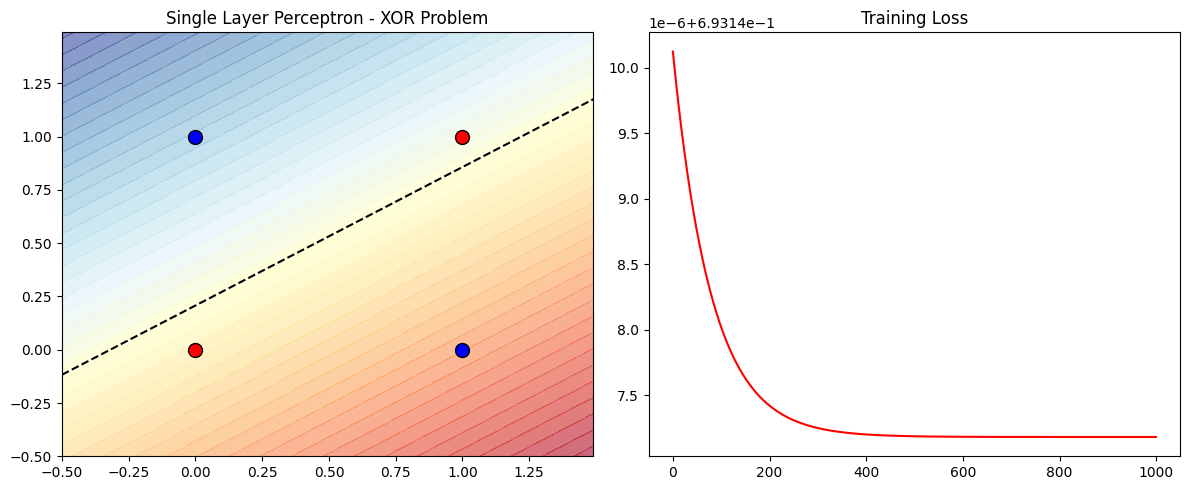

In [3]:
#Single_LayerPerceptron
import numpy as np
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.training_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        for epoch in range(self.max_epochs):
            y_pred = self.forward(X).reshape(-1, 1)
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.mean(y_pred - y)
            self.weights -= self.learning_rate * dw.flatten()
            self.bias -= self.learning_rate * db
            self.training_history.append(loss)

    def predict(self, X):
        return (self.forward(X).reshape(-1, 1) > 0.5).astype(int)

def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(mesh_points).reshape(xx.shape)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap=plt.cm.RdYlBu)
    ax1.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')
    for i in range(2):
        idx = y.flatten() == i
        ax1.scatter(X[idx, 0], X[idx, 1], c=['red', 'blue'][i], edgecolors='black', s=100)
    ax1.set_title(title)
    ax2.plot(model.training_history, 'r-')
    ax2.set_title('Training Loss')
    plt.tight_layout()
    plt.show()

def main():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    slp = SingleLayerPerceptron(learning_rate=0.1, max_epochs=1000)
    slp.fit(X, y)
    predictions = slp.predict(X)
    accuracy = np.mean(predictions.flatten() == y.flatten()) * 100
    print(f'Accuracy: {accuracy:.1f}%')
    for i in range(len(X)):
        print(f'Input: {X[i]} -> Predicted: {predictions[i,0]}, Expected: {y[i,0]}\n')
    plot_decision_boundary(slp, X, y, 'Single Layer Perceptron - XOR Problem')

if __name__ == "__main__":
    main()
